# Unsupervisioned Learning - Clustering

### A cluster refers to a collection of data points aggregated together because of certain similarities.

![clust](https://minerandodados.com.br/wp-content/uploads/2017/12/number-of-clusters.png)

In [2]:
# Vamos usar o modelo Kmeans
from sklearn.cluster import KMeans

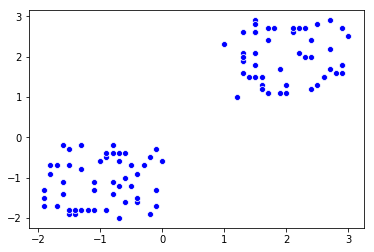

In [3]:
# Gerando dados aleatórios
X = [-1.3, -0.8, -0.4, -1.3, -0.3, -0.1, -0.5, -1.8, -1.1, -1.7, -1.9,
       -1. , -1.7, -1.5, -0.4, -0.9, -0.7, -1.8, -0.6, -0.8, -0.4, -0.7,
       -1.6, -1.6, -1.4, -0.7, -1.1, -0.9, -1.1, -0.7, -1.4, -0.9, -1.3,
       -1.5, -0.6, -0.6, -0.2, -0.8, -1.6, -0.1, -1.9, -0.2, -1.9, -1.5,
       -0.8, -1.5, -0. , -0.5, -0.1, -1.2,  2.9,  1.5,  1.7,  2.4,  1.7,
        2.3,  2.1,  1.9,  1.2,  2.9,  2.7,  2.8,  1. ,  1.5,  1.4,  2.4,
        2.6,  2.2,  1.5,  2.1,  1.3,  1.3,  1.6,  1.5,  1.6,  2.6,  1.3,
        2.7,  2. ,  1.5,  2.3,  2.5,  1.5,  1.3,  2. ,  2.7,  1.8,  1.5,
        2.5,  1.7,  2.4,  1.3,  3. ,  1.3,  1.6,  1.7,  2.9,  1.9,  2.9,
        2.2]

y = [-0.8, -1.1, -1.6, -1.8, -0.7, -0.3, -1.2, -0.7, -1.8, -0.7, -1.7,
       -0.6, -1.7, -0.3, -1.5, -0.5, -2. , -0.9, -1.6, -1.4, -0.9, -0.6,
       -0.2, -1.4, -1.9, -0.4, -1.1, -1.8, -1.3, -1.2, -1.8, -0.4, -0.2,
       -1.9, -1. , -0.4, -0.5, -0.2, -1.1, -1.7, -1.5, -1.9, -1.3, -1.8,
       -0.4, -0.7, -0.6, -0.7, -1.3, -1.8,  1.8,  1.5,  1.1,  2.4,  2.7,
        2.7,  2.6,  1.1,  1. ,  1.8,  2.2,  1.6,  2.3,  2.6,  1.5,  2. ,
        1.5,  2.7,  2.6,  2.7,  2.6,  1.9,  1.5,  1.8,  1.3,  1.5,  1.6,
        1.7,  1.1,  2.9,  2. ,  1.3,  2.1,  1.9,  1.3,  2.9,  2.7,  2.8,
        2.8,  2.4,  1.2,  2.1,  2.5,  2. ,  1.2,  1.1,  2.7,  1.7,  1.6,
        2.1]
dados = list(zip(X,y))
dados = np.array(dados)

sns.scatterplot(X, y, color='b')
plt.show()

In [15]:
# Criando nosso modelo
Kmean = KMeans(n_clusters=2)

# Fitando nosso modelo
Kmean.fit(dados);

In [16]:
# Verificando os centróides
Kmean.cluster_centers_

array([[-0.988, -1.098],
       [ 1.984,  1.974]])

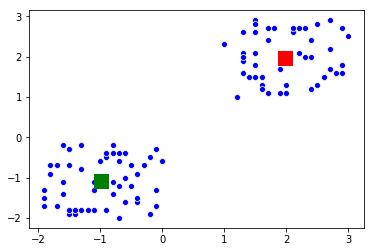

In [17]:
# Visualizando os mesmos

sns.scatterplot(X, y, color='b')

plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], 
            color='g', marker='s', s=200)

plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], 
            color='r', marker='s', s=200)

#plt.scatter(Kmean.cluster_centers_[2][0], Kmean.cluster_centers_[2][1], 
#            color='black', marker='s', s=200)

#plt.scatter(Kmean.cluster_centers_[3][0], Kmean.cluster_centers_[3][1], 
#            color='black', marker='s', s=200)


plt.show()

In [18]:
# Vendo a classificação de cada ponto
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
Kmean.inertia_

64.166

###  Inertia actually calculates the sum of all the points within a cluster from the centroid of that cluster

![inertia](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-15-32-17.png)

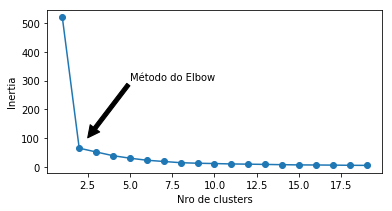

In [20]:
# fitting multiple k-means algorithms

inertias = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(dados)
    inertias.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
df = pd.DataFrame({'Cluster':range(1,20), 'Valor da inercia':inertias})
plt.figure(figsize=(6,3))
plt.plot(df['Cluster'], df['Valor da inercia'], marker='o')
plt.xlabel('Nro de clusters')
plt.ylabel('Inertia');

plt.annotate('Método do Elbow', xy=(2.5, 100), xytext=(5, 300),
            arrowprops=dict(facecolor='black', shrink=0.0005)
            );

## Na Prática

In [21]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = iris.drop('species', axis=1).values
y = iris['species']

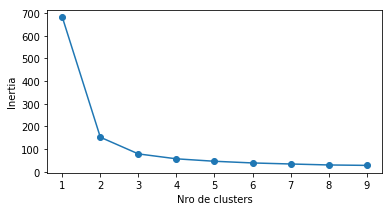

In [23]:
inertias = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
df = pd.DataFrame({'Cluster':range(1,10), 'Valor da inercia':inertias})
plt.figure(figsize=(6,3))
plt.plot(df['Cluster'], df['Valor da inercia'], marker='o')
plt.xlabel('Nro de clusters')
plt.ylabel('Inertia');

In [24]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans.fit(X);

In [25]:
predictions = kmeans.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
d = {'setosa':1,
     'virginica':2,
     'versicolor':0}
real = y.map(d)

In [27]:
pd.DataFrame({"real": real, "cluseter predito":predictions}).head()

,real,cluseter predito
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


Acuracidade do modelo: 0.8933333333333333 



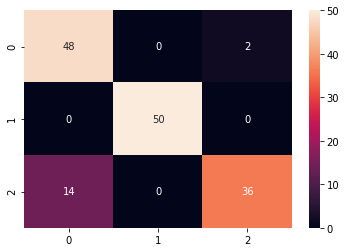

In [28]:
# Métricas

from sklearn.metrics import accuracy_score, confusion_matrix
print("Acuracidade do modelo:", accuracy_score(real, predictions), '\n')
sns.heatmap(confusion_matrix(real, predictions), annot=True, fmt='.0f');

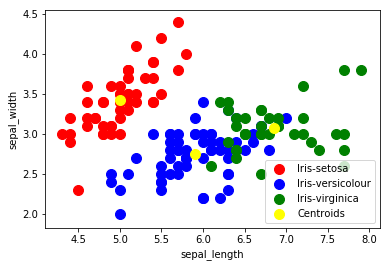

In [29]:
#Visualising the clusters
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend();

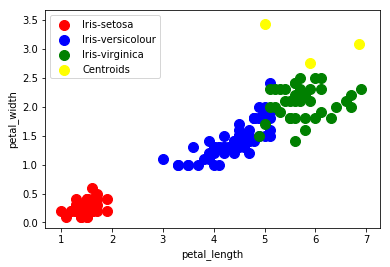

In [30]:
#Visualising the clusters
plt.scatter(X[predictions == 1, 2], X[predictions == 1, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[predictions == 0, 2], X[predictions == 0, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2, 2], X[predictions == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend();

# PCA - Principal Component Analysis

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [31]:
iris = sns.load_dataset('iris')
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

#### Featuring Scaling

In [32]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_normalizado = scaler.fit_transform(X)

In [33]:
X_normalizado = pd.DataFrame(X_normalizado, columns = X.columns)
X_normalizado.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_2_colunas = pca.fit_transform(X_normalizado)

In [35]:
df_2_colunas = pd.DataFrame(data = df_2_colunas
             , columns = ['principal component 1', 'principal component 2'])
df_2_colunas.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [36]:
# O quão cada componente principal exeplica individualmente nosso modelo?
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [26]:
# Quanto explicativo é nossos novos valores da informação existente anteriormente?
sum(pca.explained_variance_ratio_)

0.9581320720000164

[0.73, 0.958, 0.995, 1.0]

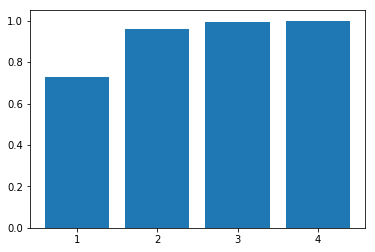

In [37]:
lista_de_variancia_contida = []
for i in range(1,5):
    pca = PCA(n_components=i)
    pca.fit_transform(X_normalizado)
    lista_de_variancia_contida.append(round(sum(pca.explained_variance_ratio_),3))
plt.bar(['1','2','3','4'],lista_de_variancia_contida)
lista_de_variancia_contida

In [38]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans.fit(df_2_colunas);

In [39]:
predictions = kmeans.predict(df_2_colunas)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Acuracidade do modelo: 0.8333333333333334 



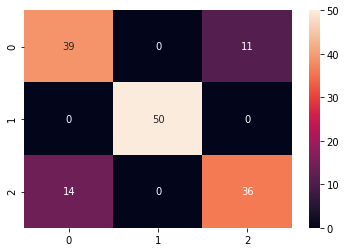

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Acuracidade do modelo:", accuracy_score(real, predictions), '\n')
sns.heatmap(confusion_matrix(real, predictions), annot=True, fmt='.0f');

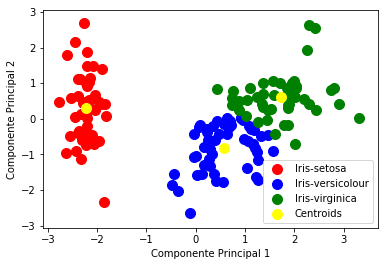

In [41]:
#Visualising the clusters
plt.scatter(df_2_colunas['principal component 1'][predictions == 1], df_2_colunas['principal component 2'][predictions == 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df_2_colunas['principal component 1'][predictions == 0], df_2_colunas['principal component 2'][predictions == 0], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df_2_colunas['principal component 1'][predictions == 2], df_2_colunas['principal component 2'][predictions == 2], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend();